In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [42]:
country="malawi"
startdate="20090701"
enddate="20191001"

### Check if mismatch of nameing Admin2/Admin1 of two data files

In [14]:
cs = pd.read_csv(f'Data/FewsNetAdmin2/{country}_admin2_fewsnet_{startdate}_{enddate}_CS.csv',index_col=0)
ml1 = pd.read_csv(f'Data/FewsNetAdmin2/{country}_admin2_fewsnet_{startdate}_{enddate}_ML1.csv',index_col=0)
ml2 = pd.read_csv(f'Data/FewsNetAdmin2/{country}_admin2_fewsnet_{startdate}_{enddate}_ML2.csv',index_col=0)

In [15]:
cs.rename(columns={"ADM0_EN":"ADMIN0","ADM1_EN":"ADMIN1","ADM2_EN":"ADMIN2"},inplace=True)
ml1.rename(columns={"ADM0_EN":"ADMIN0","ADM1_EN":"ADMIN1","ADM2_EN":"ADMIN2"},inplace=True)
ml2.rename(columns={"ADM0_EN":"ADMIN0","ADM1_EN":"ADMIN1","ADM2_EN":"ADMIN2"},inplace=True)

In [16]:
cs.head()

,date,CS,ADMIN0,ADMIN1,ADMIN2
0,2009-07-01,1.0,Malawi,Southern,Balaka
1,2009-07-01,1.0,Malawi,Southern,Blantyre
2,2009-07-01,1.0,Malawi,Southern,Blantyre City
33,2009-07-01,2.0,Malawi,Southern,Chikwawa
4,2009-07-01,1.0,Malawi,Southern,Chiradzulu


In [17]:
#merge the CS, ML1 and ML2 in one df
df_ipc = cs.merge(ml1[['date', 'ADMIN1','ADMIN2', 'ML1']], on=['ADMIN1','ADMIN2', 'date'], how='left')
df_ipc = df_ipc.merge(ml2[['date', 'ADMIN1','ADMIN2', 'ML2']], on=['ADMIN1','ADMIN2', 'date'], how='left')
df_ipc['date'] = pd.to_datetime(df_ipc['date'])
df_ipc.sort_values('date')

,date,CS,ADMIN0,ADMIN1,ADMIN2,ML1,ML2
0,2009-07-01,1.0,Malawi,Southern,Balaka,1.0,1.0
31,2009-07-01,NaN,Malawi,Northern,Likoma,NaN,NaN
30,2009-07-01,1.0,Malawi,Southern,Zomba City,1.0,1.0
29,2009-07-01,1.0,Malawi,Southern,Zomba,1.0,1.0
28,2009-07-01,1.0,Malawi,Southern,Thyolo,1.0,1.0
...,...,...,...,...,...,...,...
1139,2019-06-01,2.0,Malawi,Southern,Neno,2.0,1.0
1140,2019-06-01,1.0,Malawi,Northern,Nkhata Bay,1.0,1.0
1142,2019-06-01,2.0,Malawi,Southern,Nsanje,2.0,3.0
1144,2019-06-01,1.0,Malawi,Central,Ntchisi,1.0,1.0


In [18]:
df_pop = pd.read_csv('Data/Population_OCHA_2018/mwi_pop_adm2_32_districts.csv')

In [19]:
df_pop.head()

,FID,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM1_TYPE,ADM2_EN32,ADM2_PC32,ADM2_TYPE,validOn,...,FEMALE08,p2017pop,p2018pop,p2019pop,p2020pop,Pop_Source,Shape_Leng,Shape_Le_1,Shape_Le_2,Shape_Area
0,0,Malawi,MW,Southern,MW3,Regions,Balaka,MW312,District Council,August 2018,...,165268,422925,436937,451465,466518,Population from Census 2008 and NSO projection...,2.036817,2.036817,2.036817,0.179379
1,1,Malawi,MW,Southern,MW3,Regions,Blantyre,MW305,District Council,August 2018,...,175962,956898,994517,1033105,1072684,Population from Census 2008 and NSO projection...,2.677448,2.677448,2.677448,0.150847
2,2,Malawi,MW,Southern,MW3,Regions,Blantyre City,MW315,City Council,August 2018,...,325022,0,0,0,0,Population from Census 2008 (no projection fig...,0.818570,0.818570,0.818570,0.019929
3,3,Malawi,MW,Southern,MW3,Regions,Chikwawa,MW310,District Council,August 2018,...,219050,566283,583461,601250,619645,Population from Census 2008 and NSO projection...,3.521776,3.521776,3.521776,0.413457
4,4,Malawi,MW,Southern,MW3,Regions,Chiradzulu,MW304,District Council,August 2018,...,153200,327038,331497,336023,340614,Population from Census 2008 and NSO projection...,1.527801,1.527801,1.527801,0.064117


In [21]:
# #to test if different namings of two dataframes
np.setdiff1d(df_ipc.ADMIN2.unique(),df_pop.ADM2_EN32.unique())
# np.setdiff1d(eth_popn.admin2Name_en.unique(),df_ipc.ADMIN2.unique())

array([], dtype=object)

In [22]:
np.setdiff1d(df_pop.ADM2_EN32.unique(),df_ipc.ADMIN2.unique())

array([], dtype=object)

In [23]:
np.setdiff1d(df_pop.ADM1_EN.unique(),df_ipc.ADMIN1.unique())

array([], dtype=object)

In [24]:
np.setdiff1d(df_ipc.ADMIN1.unique(),df_pop.ADM1_EN.unique())

array([], dtype=object)

In [73]:
df_ipcp=pd.read_csv("Data/FewsNetPopulation/malawi_admin1_fewsnet_population.csv",index_col=0)
df_ipcp["date"]=pd.to_datetime(df_ipcp["date"])

In [76]:
df_ipcp2=pd.read_csv("Data/FewsNetPopulation/malawi_admin2_fewsnet_population.csv",index_col=0)
df_ipcp2["date"]=pd.to_datetime(df_ipcp2["date"])

In [75]:
df_ipcp

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,...,ML1_4,ML1_5,ML2_1,ML2_2,ML2_3,ML2_4,ML2_5,pop_CS,pop_ML1,pop_ML2
0,2009-07-01,Central,6512416,4952575,4952575.0,0.0,0.0,0.0,0.0,4952575.0,...,0.0,0.0,4952575.0,0.0,0.0,0.0,0.0,4952575.0,4952575.0,4952575.0
1,2009-07-01,Northern,1459888,1110217,1102226.0,0.0,0.0,0.0,0.0,1102226.0,...,0.0,0.0,1102226.0,0.0,0.0,0.0,0.0,1102226.0,1102226.0,1102226.0
2,2009-07-01,Southern,6773465,5151096,4457022.0,694074.0,0.0,0.0,0.0,4457022.0,...,0.0,0.0,4457022.0,694074.0,0.0,0.0,0.0,5151096.0,5151096.0,5151096.0
3,2009-10-01,Central,6512416,4952575,4952575.0,0.0,0.0,0.0,0.0,4952575.0,...,0.0,0.0,4952575.0,0.0,0.0,0.0,0.0,4952575.0,4952575.0,4952575.0
4,2009-10-01,Northern,1459888,1110217,1102226.0,0.0,0.0,0.0,0.0,1102226.0,...,0.0,0.0,1102226.0,0.0,0.0,0.0,0.0,1102226.0,1102226.0,1102226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2019-02-01,Northern,1459888,1459888,1077895.0,381993.0,0.0,0.0,0.0,1077895.0,...,0.0,0.0,1459888.0,0.0,0.0,0.0,0.0,1459888.0,1459888.0,1459888.0
107,2019-02-01,Southern,6773465,6773465,802455.0,5971010.0,0.0,0.0,0.0,802455.0,...,0.0,0.0,6773465.0,0.0,0.0,0.0,0.0,6773465.0,6773465.0,6773465.0
108,2019-06-01,Central,6512416,6512416,6512416.0,0.0,0.0,0.0,0.0,6512416.0,...,0.0,0.0,6512416.0,0.0,0.0,0.0,0.0,6512416.0,6512416.0,6512416.0
109,2019-06-01,Northern,1459888,1459888,1077895.0,381993.0,0.0,0.0,0.0,1077895.0,...,0.0,0.0,1077895.0,0.0,381993.0,0.0,0.0,1459888.0,1459888.0,1459888.0


In [44]:
len(df_ipcp.date.unique())*len(df_ipcp.ADM1_EN.unique())

111

In [36]:
len(df_ipcp)

111

In [45]:
len(df_ipcp2.date.unique())*len(df_ipcp2.ADM2_EN.unique())

1184

In [34]:
len(df_ipcp2)

1170

In [43]:
# df_ipcp2.groupby(["ADM1_EN","ADM2_EN"]).count()

In [60]:
df_ipc[df_ipc.CS==3]

,date,CS,ADMIN0,ADMIN1,ADMIN2,ML1,ML2
131,2010-07-01,3.0,Malawi,Southern,Chikwawa,3.0,3.0
150,2010-07-01,3.0,Malawi,Southern,Nsanje,3.0,3.0
386,2012-10-01,3.0,Malawi,Southern,Blantyre City,3.0,4.0
388,2012-10-01,3.0,Malawi,Southern,Chiradzulu,3.0,4.0
412,2012-10-01,3.0,Malawi,Southern,Thyolo,3.0,4.0
419,2013-01-01,3.0,Malawi,Southern,Chikwawa,3.0,1.0
640,2014-10-01,3.0,Malawi,Southern,Balaka,3.0,1.0
641,2014-10-01,3.0,Malawi,Southern,Blantyre,3.0,1.0
655,2014-10-01,3.0,Malawi,Southern,Mulanje,3.0,1.0
665,2014-10-01,3.0,Malawi,Southern,Phalombe,3.0,1.0


In [61]:
df_ipcp.columns

Index(['Unnamed: 0', 'date', 'ADM1_EN', 'Total', 'adjusted_population', 'CS_1',
       'CS_2', 'CS_3', 'CS_4', 'CS_5', 'ML1_1', 'ML1_2', 'ML1_3', 'ML1_4',
       'ML1_5', 'ML2_1', 'ML2_2', 'ML2_3', 'ML2_4', 'ML2_5', 'pop_CS',
       'pop_ML1', 'pop_ML2'],
      dtype='object')

In [67]:
df_ipcp.date.max()

'2019-06-01'

In [69]:
df_ipcp

,Unnamed: 0,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,...,ML1_4,ML1_5,ML2_1,ML2_2,ML2_3,ML2_4,ML2_5,pop_CS,pop_ML1,pop_ML2
0,0,2009-07-01,Central,6512416,4952575,4952575.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4952575.0,0.0,0.0,0.0,0.0,4952575.0,4952575.0,4952575.0
1,1,2009-07-01,Northern,1459888,1110217,1102226.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1102226.0,0.0,0.0,0.0,0.0,1102226.0,1102226.0,1102226.0
2,2,2009-07-01,Southern,6773465,5151096,4457022.0,694074.0,0.0,0.0,0.0,...,0.0,0.0,4457022.0,694074.0,0.0,0.0,0.0,5151096.0,5151096.0,5151096.0
3,3,2009-10-01,Central,6512416,4952575,4952575.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4952575.0,0.0,0.0,0.0,0.0,4952575.0,4952575.0,4952575.0
4,4,2009-10-01,Northern,1459888,1110217,1102226.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1102226.0,0.0,0.0,0.0,0.0,1102226.0,1102226.0,1102226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,2019-02-01,Northern,1459888,1459888,1077895.0,381993.0,0.0,0.0,0.0,...,0.0,0.0,1459888.0,0.0,0.0,0.0,0.0,1459888.0,1459888.0,1459888.0
107,107,2019-02-01,Southern,6773465,6773465,802455.0,5971010.0,0.0,0.0,0.0,...,0.0,0.0,6773465.0,0.0,0.0,0.0,0.0,6773465.0,6773465.0,6773465.0
108,108,2019-06-01,Central,6512416,6512416,6512416.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6512416.0,0.0,0.0,0.0,0.0,6512416.0,6512416.0,6512416.0
109,109,2019-06-01,Northern,1459888,1459888,1077895.0,381993.0,0.0,0.0,0.0,...,0.0,0.0,1077895.0,0.0,381993.0,0.0,0.0,1459888.0,1459888.0,1459888.0


In [78]:
df_pop.p2019pop.sum()

14745769

In [79]:
df_ipcp[df_ipcp.date=="2019-06"].Total.sum()

14745769

In [80]:
df_ipcp[df_ipcp.date=="2019-06"]

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,...,ML1_4,ML1_5,ML2_1,ML2_2,ML2_3,ML2_4,ML2_5,pop_CS,pop_ML1,pop_ML2
108,2019-06-01,Central,6512416,6512416,6512416.0,0.0,0.0,0.0,0.0,6512416.0,...,0.0,0.0,6512416.0,0.0,0.0,0.0,0.0,6512416.0,6512416.0,6512416.0
109,2019-06-01,Northern,1459888,1459888,1077895.0,381993.0,0.0,0.0,0.0,1077895.0,...,0.0,0.0,1077895.0,0.0,381993.0,0.0,0.0,1459888.0,1459888.0,1459888.0
110,2019-06-01,Southern,6773465,6773465,2914975.0,3858490.0,0.0,0.0,0.0,2914975.0,...,0.0,0.0,3096458.0,0.0,3677007.0,0.0,0.0,6773465.0,6773465.0,6773465.0


In [59]:
df_ipc.CS.unique()

array([ 1.,  2., nan,  3.])

In [193]:
df_ipcp[np.isnan(df_ipcp.pop_CS)]

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,...,ML1_4,ML1_5,ML2_1,ML2_2,ML2_3,ML2_4,ML2_5,pop_CS,pop_ML1,pop_ML2
99,2018-10-01,Central,6512416,6346569,NaN,NaN,NaN,NaN,NaN,1826220.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6346569.0,NaN
100,2018-10-01,Northern,1459888,1422708,NaN,NaN,NaN,NaN,NaN,1422708.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1422708.0,NaN
101,2018-10-01,Southern,6773465,6600968,NaN,NaN,NaN,NaN,NaN,107725.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6600968.0,NaN


In [197]:
# df_ipcp[df_ipcp.ADM1_EN=="Southern"]

In [195]:
df_ipcp[df_ipcp.date=="2012-07"]

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,...,ML1_4,ML1_5,ML2_1,ML2_2,ML2_3,ML2_4,ML2_5,pop_CS,pop_ML1,pop_ML2
36,2012-07-01,Central,4381359,3624862,3624862.0,0.0,0.0,0.0,0.0,3098149.0,...,0.0,0.0,3098149.0,526713.0,0.0,0.0,0.0,3624862.0,3624862.0,3624862.0
37,2012-07-01,Northern,761347,629890,629890.0,0.0,0.0,0.0,0.0,629890.0,...,0.0,0.0,629890.0,0.0,0.0,0.0,0.0,629890.0,629890.0,629890.0
38,2012-07-01,Southern,4952872,4097692,4097692.0,0.0,0.0,0.0,0.0,970281.0,...,0.0,0.0,970281.0,2554964.0,572447.0,0.0,0.0,4097692.0,4097692.0,4097692.0


In [192]:
df_ipcp.pop_CS.unique()

array([4952575., 1102226., 5151096., 5092380., 1133339., 5296505.,
       5237641., 1165669., 5447589., 1174120., 5387964., 1199125.,
       5603936., 3624862.,  629890., 4097692., 1207818., 5542454.,
       1242450., 5764624., 1233508., 3834678.,  666349., 4334879.,
       5699833., 1277729., 5928309., 5859114., 1313436., 6093973.,
       6019953., 1349490., 6261260., 1339777., 6182446., 1385916.,
       6430265., 6346569., 1422708., 6600968.,      nan, 6512416.,
       1459888., 6773465.])

### Data analysis

In [187]:
def plot_ipclevels(df,adm1c="ADMIN1"):
    color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
    width = 75
    count = 1
    fig, ax = plt.subplots(figsize=(15,30))
    plt.suptitle('IPC at Admin1 Level')
    for region in df[adm1c].unique():
        ax = plt.subplot(6,2,count)
        data = df[df[adm1c]==region]
        data[[f'CS_{i}' for i in range(1,6)]]=data[[f'CS_{i}' for i in range(1,6)]].fillna(0)
        data=data.sort_values("date")
        #probably way easier way to get this, but get cs columns where sum is larger than 0 (i.e. datapoints belong to that class)
        cs_cols=[f'CS_{i}' for i in range(1,6)]
        c=data[cs_cols]
        cs_sumcol=list(c.loc[:,c[cs_cols].sum()>0].columns)
#         print(data)
#         p4 = plt.bar(data['date'], data['CS_4'], width=width, color=color_map[4],label="IPC 4")
        cs_sumcolnum=[int(s[-1]) for s in cs_sumcol]
        for i in cs_sumcolnum:
            plt.bar(data['date'], data[f'CS_{i}'],width=width,color=color_map[i],bottom=data[[f'CS_{k}' for k in range(i+1,max(cs_sumcolnum))]].sum(axis=1).to_numpy(),label=f"IPC {i}")
#         p3 = plt.bar(data['date'], data['CS_3'], width=width, color=color_map[3], bottom=data['CS_4'].to_numpy(),label="IPC 3")
#         p2 = plt.bar(data['date'], data['CS_2'], width=width, color=color_map[2], bottom=(data['CS_3']+data['CS_4']).to_numpy(),label="IPC 2")
#         p1 = plt.bar(data['date'], data['CS_1'], width=width, color=color_map[1], bottom=(data['CS_2']+data['CS_3']+data['CS_4']).to_numpy(),label="IPC 1")
        p5 = plt.plot(data['date'], data['pop_CS']/10 , color='red',label="10%")
        p6 = plt.plot(data['date'], data['pop_CS']/5, color='black',label="20%")
        plt.title(region + ' Current Situation')
    #         ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('IPC 1', 'IPC 2', 'IPC 3', 'IPC 4', '10 %', '20 %'),loc="upper right")
        ax.legend(loc="upper right")
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        count+=1

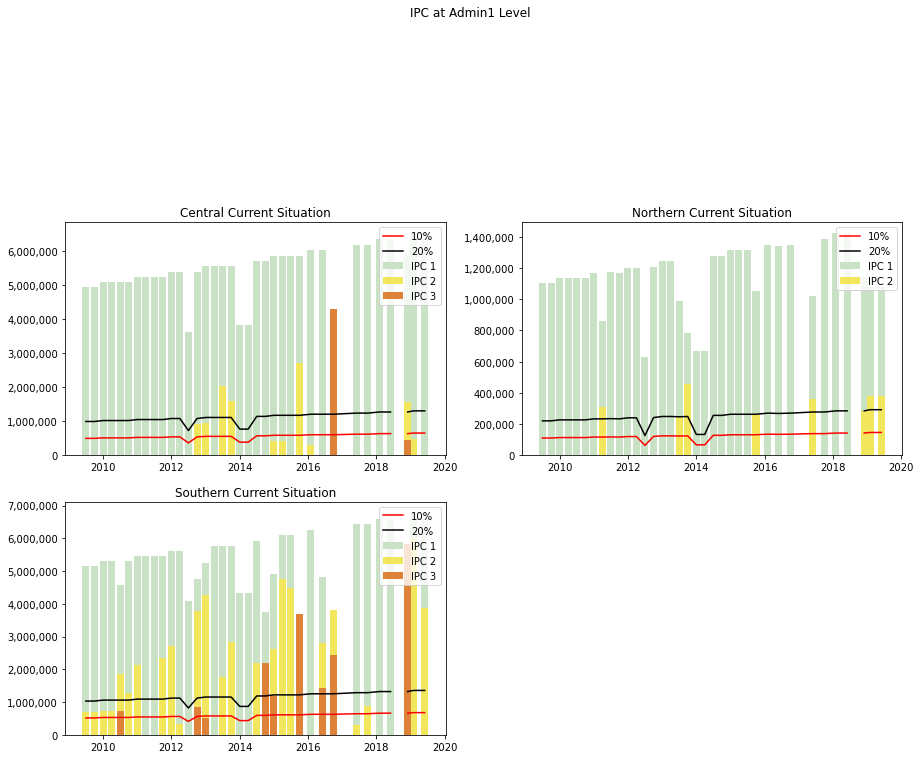

In [188]:
plot_ipclevels(df_ipcp,adm1c="ADM1_EN")